# Carregando dados do csv

In [2]:
import unicodecsv 

#funcao para ler o csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [4]:
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

## Arrumando os tipos de dados

In [5]:
from datetime import datetime as dt

# Recebe uma data como string e returna em datetime 
# Se data for vazia retorna None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Recebe uma string que pode vir um inteiro,
# caso inteiro retorna o int, caso vazio retorna None
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Arrumando os tipos de dados da tabela enrollment
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# Arrumando os tipos de dados da tabela engagement
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# Arrumando os tipos de dados da tabela submissions
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigando os dados

In [8]:
# unique_enrollment = set()
# for enrollment in enrollments:
#     unique_enrollment.add(enrollment['account_key'])
# Funçao que retorna um conjunto de chaves unicas para a contagem
def unique_keys(table, key):
    unique_set = set()
    for row in table:
        unique_set.add(row[key])
    return unique_set

enrollment_num_rows = len(enrollments)  
print(enrollment_num_rows)
enrollment_num_unique_students = len(unique_keys(enrollments, 'account_key'))
print(enrollment_num_unique_students)

daily_engagement_num_rows = len(daily_engagement)  
print(daily_engagement_num_rows)
daily_engagement_num_unique = len(unique_keys(daily_engagement, 'acct'))
print(daily_engagement_num_unique)

project_submissions_num_rows = len(project_submissions)  
print(project_submissions_num_rows)
unique_project_submitters = len(unique_keys(project_submissions, 'account_key'))
print(unique_project_submitters)

1640
1302
136240
1237
3642
743


## Problemas nos dados
#### Renomear coluna acct para account_key

In [9]:
#padronizando o nome da chave dos alunos
for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del[engagement['acct']]

In [10]:
#funcao para retornar estudantes únicos
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [11]:
print(len(enrollments))
unique_enrolled_students = get_unique_students(enrollments)
print(len(unique_enrolled_students))
print(len(daily_engagement))
unique_engagement_students = get_unique_students(daily_engagement)
print(len(unique_engagement_students))
print(len(project_submissions))
unique_project_submitters = get_unique_students(project_submissions)
print(len(unique_project_submitters))

1640
1302
136240
1237
3642
743


## Encontrando estudantes que não aparecem na tabela de engajamentos

In [12]:
#procurar porque alguns alunos inscritos não aparecem nos engajamentos
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [13]:
#identificando o numero de estudantes que ainda apresentam problemas(não estao no engajamento)
num_problems_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['cancel_date'] != enrollment['join_date']:
        num_problems_students += 1
        print(enrollment)
num_problems_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

## Encontrando outros problemas

In [14]:
#os que possuem problemas, na verdade sao contas de teste, será contado a seguir quantas contas de teste existem
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
#variavel que possui as chaves das contas de teste
len(udacity_test_accounts)

6

In [15]:
#retirando contas de teste
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [16]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refinando a questão

In [17]:
#retornar a lista de alunos que não cancelaram dentro de 7 dias
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel']>7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        #para não repetir alunos, so vai ser incluido na lista caso não esteja na lista
        #ou se a data de cadastro for mais recente aí o registro na lista vai ser atualizado
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Buscando dados da primeira semana

In [18]:
#retorna se o numero de dias foi menor que 7
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

#remove os cancelamentos de períodos de testes
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students: 
            new_data.append(data_point) 
    return new_data

In [19]:
#removendo cancelamentos free trial pela funcao 
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [20]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [21]:
#engajamento de alunos na primeira semana
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
len(paid_engagement_in_first_week)

6919

## Explorando engajamento dos alunos

#### Usando defaultdict

In [22]:
#default dict permite especificar um valor padrao, 
# ex. caso seja vazio ele retorna uma lista vazia usando tipo (list)
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
    

In [23]:
total_minutes_by_account = {}
#cada account_key possui uma lista de engajamentos
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


In [25]:
max(total_minutes_by_account.items(), key=lambda pair: pair[1])

(u'163', 3564.7332644989997)

In [26]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes

3564.7332644989997

In [27]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


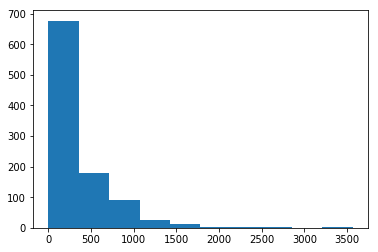

In [28]:
#escrevendo funcoes para procurar outras propriedades
def student_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
#utilizando a funcao
engagement_by_account = student_data(paid_engagement_in_first_week,
'account_key')

#funcao para soma de itens de cada estudantes
def sum_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
            summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_items(engagement_by_account,
'total_minutes_visited')

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
    
describe_data(total_minutes_by_account.values())

## Aulas concluídas na primeira semana

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


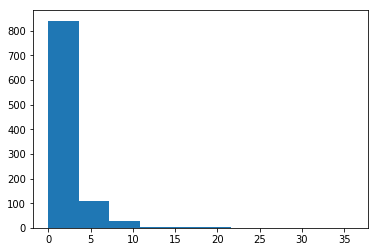

In [29]:
lessons_by_student = sum_items(engagement_by_account, 'lessons_completed')
describe_data(lessons_by_student.values())

## Número de visitas na primeira semana

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


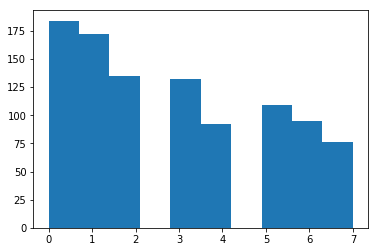

In [30]:
days_visited_by_account = sum_items(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

## Dividindo alunos aprovados

In [31]:
subway_project_lesson_keys = ['746169184', '3176718735']
passing_engagement = []
non_passing_engagement = []
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])
print(len(pass_subway_project))

647


In [32]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparando os dois grupos de alunos

# comparando por tempo

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


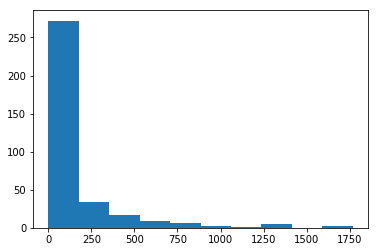

In [33]:
passing_engagement_by_account = student_data(passing_engagement,
'account_key')
non_passing_engagement_by_account = student_data(non_passing_engagement,
'account_key')

print 'non-passing students:'
non_passing_minutes = sum_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


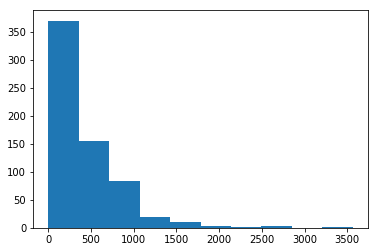

In [34]:
print 'passing students:'
passing_minutes = sum_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

## comparando por aulas

non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


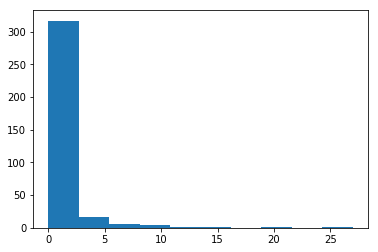

In [35]:
print 'non-passing students:'
non_passing_lessons = sum_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


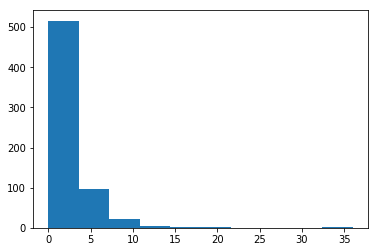

In [36]:
print 'passing students:'
passing_lessons = sum_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

## Comparando por num de visitas

non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7


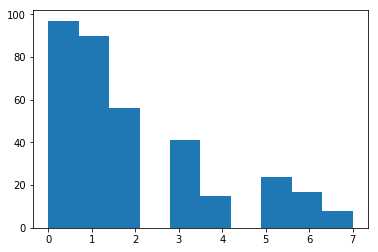

In [37]:
print 'non-passing students:'
non_passing_visits = sum_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


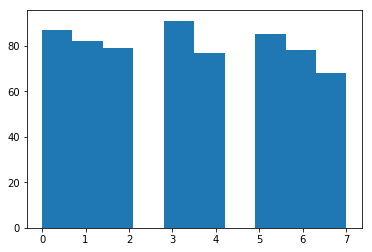

In [42]:
print 'passing students:'
passing_visits = sum_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())

## Melhorando os gráficos

In [51]:
#seaborn melhora o layout dos graficos
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Número de dias')
plt.title('Distribuicao de visitas nas aulas na primeira semana para alunos que nao passaram no projeto do metro')

Text(0.5,1,'Distribuicao de visitas nas aulas na primeira semana para alunos que nao passaram no projeto do metro')

Error in callback <function post_execute at 0x00000000158E9F28> (for post_execute):


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 432x288 with 1 Axes>

Text(0.5,1,'Distribuicao de visitas nas aulas na primeira semana para alunos que passaram no projeto do metro')

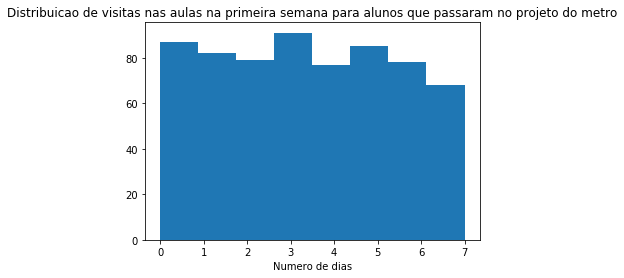

In [50]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Numero de dias')
plt.title('Distribuicao de visitas nas aulas na primeira semana para alunos que passaram no projeto do metro')